In [ ]:
# import libraries
import os
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
from sklearn import pipeline
from sklearn import preprocessing
from sklearn import tree

# set random_state
random_state = 42

In [ ]:
# import from url
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)
df = pd.read_csv('temp.csv', sep=',', header=None)

# set columns and index
df.columns = ['case_id', 'type'] + ['a' + str(x) for x in range(1,31)]
df.set_index ('case_id', inplace=True, drop=True) 

In [ ]:
df.head()

,type,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30
case_id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    569 non-null    object 
 1   a1      569 non-null    float64
 2   a2      569 non-null    float64
 3   a3      569 non-null    float64
 4   a4      569 non-null    float64
 5   a5      569 non-null    float64
 6   a6      569 non-null    float64
 7   a7      569 non-null    float64
 8   a8      569 non-null    float64
 9   a9      569 non-null    float64
 10  a10     569 non-null    float64
 11  a11     569 non-null    float64
 12  a12     569 non-null    float64
 13  a13     569 non-null    float64
 14  a14     569 non-null    float64
 15  a15     569 non-null    float64
 16  a16     569 non-null    float64
 17  a17     569 non-null    float64
 18  a18     569 non-null    float64
 19  a19     569 non-null    float64
 20  a20     569 non-null    float64
 21  a21     569 non-null    float64


**note**: no null values

# a
**a)	We would like to perform a predictive modeling analysis on this same dataset using the a) decision tree, b) the k-NN technique and c) the logistic regression technique. Using the nested cross-validation technique, try to optimize the parameters of your classifiers in order to improve the performance of your classifiers (i.e., f1-score) as much as possible. Please make sure to always use a random state of “42” whenever applicable. What are your optimal parameters and what is the corresponding performance of these classifiers? Please provide screenshots of your code and explain the process you have followed.**

part a is worth 25 points in total:
* 7 points for correctly optimizing at least two parameters for the Decision Tree and providing screenshots/explaining what you are doing and the corresponding results
* 7 points for correctly optimizing at least two parameters for the kNN and providing screenshots/explaining what you are doing and the corresponding results
* 7 points for correctly optimizing at least two parameters for the Logistic Regression and providing screenshots/explaining what you are doing and the corresponding results
* 4 points for contrasting their performance of all three algorithms and discussing which one would you prefer to use

In [ ]:
# make malignant into positive case
df = df.replace({'type': {'M':1,'B':0}})

# split into X and y
target = 'type'
X = df.drop(target, axis=1).copy()
y = df[target].copy()

In [ ]:
# scale the data
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [ ]:
# folds for nested cross-validation
inner_cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=random_state)
outer_cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=random_state)

# measure
scoring = 'f1'

## Decision Tree

In [ ]:
# create a model
clf_tree = tree.DecisionTreeClassifier(random_state=random_state)

# two parameters to optimize
min_samples_split_list = [2, 4, 6, 8, 10]
max_depth_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None]

# select the optimal parameters
gs_tree = model_selection.GridSearchCV(estimator=clf_tree,
                                       param_grid=[{
                                           'min_samples_split': min_samples_split_list,
                                           'max_depth': max_depth_list}],
                                       scoring=scoring,                                      
                                       cv=inner_cv) 


gs_tree_fit = gs_tree.fit(X,y)

print("Non-nested Tuning:")
print("  Model: ", gs_tree_fit.best_estimator_)
print("  Parameterization: ", gs_tree_fit.best_params_)
print("  Non-nested CV {} score: ".format(scoring), gs_tree_fit.best_score_)

# generalization performance
nested_gs_tree_fit = model_selection.cross_val_score(gs_tree_fit, 
                                                     X=X, 
                                                     y=y, 
                                                     scoring=scoring,
                                                     cv=outer_cv)

print("nested Tuning:")
print("  Nested CV {} mean: ".format(scoring), nested_gs_tree_fit.mean(), " with st.dev (+/-): ", nested_gs_tree_fit.std())

Non-nested Tuning:
  Model:  DecisionTreeClassifier(max_depth=5, min_samples_split=8, random_state=42)
  Parameterization:  {'max_depth': 5, 'min_samples_split': 8}
  Non-nested CV f1 score:  0.9307792540399402
nested Tuning:
  Nested CV f1 mean:  0.924362141740475  with st.dev (+/-):  0.009426492442464426


## k-NN

In [ ]:
clf_knn = neighbors.KNeighborsClassifier(
    p=2,                     
    metric='minkowski',
    n_jobs=-1)

# two parameters to optimize
weights_list = ['uniform', 'distance']
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# select the optimal parameters
gs_knn = model_selection.GridSearchCV(estimator=clf_knn,
                                      param_grid=[{
                                          'weights': weights_list,
                                          'n_neighbors': n_neighbors_list}],
                                      scoring=scoring,                                      
                                      cv=inner_cv) 


gs_knn_fit = gs_knn.fit(X,y)

print("Non-nested Tuning:")
print("  Model: ", gs_knn_fit.best_estimator_)
print("  Parameterization: ", gs_knn_fit.best_params_)
print("  Non-nested CV {} score: ".format(scoring), gs_knn_fit.best_score_)

nested_gs_knn_fit= model_selection.cross_val_score(gs_knn_fit, 
                                                   X=X, 
                                                   y=y, 
                                                   scoring=scoring,
                                                   cv=outer_cv)


# generalization performance
print("\nNested Tuning:")
print("  Nested CV {} mean: ".format(scoring), nested_gs_knn_fit.mean(), " with st.dev (+/-): ", nested_gs_knn_fit.std())

Non-nested Tuning:
  Model:  KNeighborsClassifier(n_jobs=-1, n_neighbors=11)
  Parameterization:  {'n_neighbors': 11, 'weights': 'uniform'}
  Non-nested CV f1 score:  0.9179772664824595

Nested Tuning:
  Nested CV f1 mean:  0.9016213789309269  with st.dev (+/-):  0.048704377110524257


## Logistic Regression

In [ ]:
clf_lr = linear_model.LogisticRegression(multi_class='auto',
                                         max_iter=100000,
                                         solver='liblinear',
                                         random_state=random_state)

# two parameters to optimize
penalty_list = ['l2', 'l1']
c_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


# select the optimal parameters
gs_lr = model_selection.GridSearchCV(
    estimator=clf_lr,
    param_grid=[{
        'penalty': penalty_list,
        'C': c_list}],
    scoring=scoring,                                      
    cv=inner_cv) 

gs_lr_fit = gs_lr.fit(X,y)

print("Non-nested Tuning:")
print("  Model: ", gs_lr_fit.best_estimator_)
print("  Parameterization: ", gs_lr_fit.best_params_)
print("  Non-nested CV {} score: ".format(scoring), gs_lr_fit.best_score_)


# generalization performance
nested_gs_lr_fit= model_selection.cross_val_score(
    gs_lr_fit, 
    X=X, 
    y=y, 
    scoring=scoring,
    cv=outer_cv)

print("\nNested Tuning:")
print("  Nested CV {} mean: ".format(scoring), nested_gs_lr_fit.mean(), " with st.dev (+/-): ", nested_gs_lr_fit.std())

Non-nested Tuning:
  Model:  LogisticRegression(C=12, max_iter=100000, penalty='l1', random_state=42,
                   solver='liblinear')
  Parameterization:  {'C': 12, 'penalty': 'l1'}
  Non-nested CV f1 score:  0.9554785334598692

Nested Tuning:
  Nested CV f1 mean:  0.9507947241663167  with st.dev (+/-):  0.028210324572927197


## Modeling Discussion
Our logistic regression with parameters c=12 and l1 regularization is our best model in terms of its generalization performance. This is because it had the highest f1 score on the nested portion of the CV. 

The decision tree with parameters max_depth=5 and min_samples_split=8 also had a good nested f1 score as well as a lower standard deviation in its nested f1 score. This means that we would expect more consist classification results when making out-of-sample predictions.

Finally, our kNN model with n=11 and weights=11 still yielded a decent nested f1 score and would generalized relatively well if we needed to use it.

---
**Note**: We experimented with using a min-max scaled version of X. This yielded much better generalization performance for kNN (to be expected) and incrementally better performance for Logistic Regression. It did NOT change our final model selection (Logistic Regression), though it did yield slightly different parameterization (c=4, penalty=l1)

In the end, we chose to compare the unscaled X results as we felt it was more in line with the homework assignment's instructions.

# b
**b)	Build and visualize a learning curve for the logistic regression technique (visualize the performance for both training and test data in the same plot). Please provide screenshots of your code and explain the process you have followed.**

part b is worth 25 points in total:
* 8 points for correct visualization of learning curve for in-sample sample performance – show the performance for 10 different sizes - provide screenshots of your code and explain the process you have followed.
* 8 points for correct visualization of learning curve for out-sample sample performance – show the performance for 10 different sizes - provide screenshots of your code and explain the process you have followed.	
* 9 points for discussing what we can learn from this specific learning curve – what are the insights that can be drawn


## Learning Curve for Logistic Regression

In [ ]:
def plot_learning_curve(estimator,
            title,            
            X, 
            y,             
            ylim=None,        
            cv=None,          
            n_jobs=1,         
            train_sizes=np.linspace(.1, 1.0, 10)): 
    plt.figure()                    
    plt.title(title)                
    if ylim is not None:            
        plt.ylim(*ylim)
    plt.xlabel("Training examples") 
    plt.ylabel("F1 score")             
    
    train_sizes, train_scores, test_scores = model_selection.learning_curve(estimator, 
                                  X, y,
                                  cv=cv,    
                                  n_jobs=n_jobs,
                                  scoring="f1",
                                  train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()                      

    plt.fill_between(train_sizes,                         
                     train_scores_mean - train_scores_std,   
                     train_scores_mean + train_scores_std,   
                     alpha=0.1,                 
                     color="r")                 
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1,
                     color="g")            
    
    plt.plot(train_sizes,                       
             train_scores_mean,               
             'o-',                     
             color="r",                   
             label="In-sample performance")           
    
    plt.plot(train_sizes, 
             test_scores_mean, 
             'o-', 
             color="g",                  
             label="Out-of-sample performance")

    plt.legend(loc="best")                     
    plt.xticks(train_sizes)                    
    return plt    
  

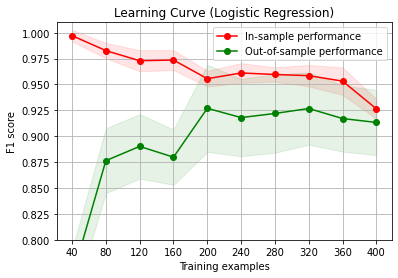

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
import matplotlib.pyplot as plt

title = "Learning Curve (Logistic Regression)"
estimator = LogisticRegression()  
# 10 estimators of size 40
train_size_logistic = np.array([40,80,120,160,200,240,280,320,360,400])

plot_learning_curve(estimator,      
          title,          
          X, 
          y,           
          (0.8, 1.01),    
          cv=inner_cv,          
          n_jobs=4,       
          train_sizes=train_size_logistic)       

plt.show()                    

## Learning Curve Discussion
Interestingly, performance of the in-sample model become worse when the sample size increase. 

Performance for the out-sample grows until around 200 observations. As the line grows flat, it becomes not cost effective to increase performance through increasing sample size.

# c
**c)	Build a fitting graph for different depths of the decision tree (visualize the performance for both training and test data in the same plot). Please provide screenshots of your code and explain the process you have followed.**

part c is worth 25 points in total:
* 8 points for correct visualization of fitting graph for in-sample sample performance – show the performance for 15 different values- provide screenshots of your code and explain the process you have followed
* 8 points for correct visualization of fitting graph for out-of-sample performance – show the performance for 15 different values- provide screenshots of your code and explain the process you have followed
* 9 points for discussing what we can learn from this specific fitting graph – what are the insights that can be drawn


## Fitting Curve for Decision Tree Depth

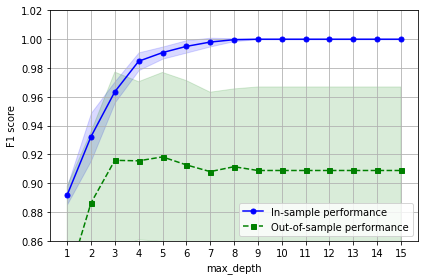

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=42)

param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# set the training and test scores to vary parameter values
train_scores, test_scores = model_selection.validation_curve( 
                estimator=tree.DecisionTreeClassifier(random_state=0), 
                X=X_train, 
                y=y_train,
                param_name="max_depth", 
                param_range=param_range,
                cv=10,                  
                scoring="f1",
                n_jobs=4)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range,                      
         train_mean,                      
         color='blue',                    
         marker='o',                      
         markersize=5,                    
         label='In-sample performance')       


plt.fill_between(param_range,             
                 train_mean + train_std,  
                 train_mean - train_std,  
                 alpha=0.15,              
                 color='blue')            

plt.plot(param_range, 
         test_mean, 
         color='green', 
         linestyle='--', 
         marker='s', 
         markersize=5, 
         label='Out-of-sample performance')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xticks(range(1, 16))
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('F1 score')
plt.ylim([0.86, 1.02])
plt.tight_layout()
plt.show()            

## Fitting Curve Discussion
For the in-sample part, we consider f1 score. We first used 
train_test_split to split the imported data into two datasets with test set equals to 20 and random state equals to 42. Then, we set 15 parameters for the training process and set the training score. With the calculated training score, we calculated the mean and standard deviation of the train f1 score. After that, we plotted the f1 means of cross-validation and filled the gap area with standard deviation. Finally, we set the grid distance/start/end line to make the visualization look better, expanding the grid height by 0.02 on each side compared by default grid height.  

For the out-of-sample (validation accuracy) part, the process is very similar except with test scores. We calculated the mean and standard deviation of the test score. After that, we plotted the f1 means of cross-validation and filled the gap area with standard deviation. Finally, we set the grid distance/start/end line to make the visualization look better, expanding the grid height by 0.02 on each side compared by default grid height.  

To summarize, we plotted a fitting curve for both in-sample and out-of-sample performance based on 15 different max_depth parameters, which decide the decision tree performance. The fitting curve between in-sample performance and out-of-sample performance has a big gap, but in general we see that max_depth of 3 is ideal for out-of-sample performance.

# d
d)	Create an ROC curve for k-NN, decision tree, and logistic regression. Discuss the results. Which classifier would you prefer to choose? Please provide screenshots of your code and explain the process you have followed.

part d is worth 25 points in total:
* 5 points for correct visualization of ROC graph for kNN – use optimal kNN from part a
* 5 points for correct visualization of ROC graph for Decision Tree – use optimal Decision Tree from part a
* 5 points for correct visualization of ROC graph for Logistic Regression – use optimal Logistic Regression from part a
* 2 points for showing all the ROC graphs in one single plot
* 3 points for showing AUC estimators in the ROC graph
* 5 points for discussing and correctly identifying which classifier you would use

## ROC Graph for k-NN, Decision Tree, and Logistic Regression

10-fold cross validation:

ROC AUC: 0.99 (+/- 0.01) [Logistic regression]
ROC AUC: 0.92 (+/- 0.05) [Decision tree]
ROC AUC: 0.97 (+/- 0.02) [kNN]


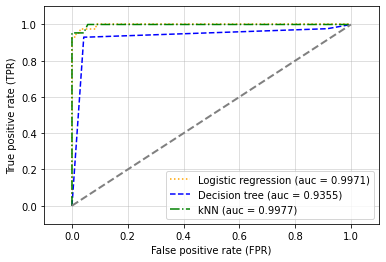

In [ ]:
# Logistic Regression Classifier
clf1 = linear_model.LogisticRegression(C=12, max_iter=100000, penalty='l1', random_state=random_state, solver='liblinear')

# Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=8, random_state=random_state)

# kNN Classifier
clf3 = neighbors.KNeighborsClassifier(n_neighbors=11,
                                     p=2, 
                                     metric='minkowski',
                                     n_jobs=-1,
                                     weights='uniform')

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

print('10-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3], clf_labels):
    scores = model_selection.cross_val_score(estimator=clf,
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

colors = [ 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = metrics.auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.4f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

## ROC Graph Discussion
The ROC curve demonstrates the trade-off between True Postive and False Positive rate to illustrate the impact of different classification thesholds. Here, our area-under-the-curve (AUC) is highest for the kNN. This would potentially change our recommendation from the Logistic Regression to the kNN as it would be more robust under different thresholds. 